---
# 1) Introdução
---

Neste notebook será estudo a **Cobertura Vacinal** desde de **1995** a **2018** da vacina **BCG** no Brasil. A vacina BCG previne contra as formas graves da tuberculose, como a meningite tuberculosa e a tuberculose miliar [[1]](http://blog.saude.mg.gov.br/2019/07/02/bcg-tire-suas-duvidas-sobre-essa-vacina/). Os dados foram retirados do [DATASUS-Tabnet [2]](http://tabnet.datasus.gov.br/cgi/tabcgi.exe?pni/cnv/cpniuf.def) por região.

A métrica utilizada para avaliar a vacinação no Brasil é a **Cobertura Vacinal**. A fórmula de **Cálculo da Cobertura** é o **número de doses** aplicadas da dose indicada (1ª, 2ª, 3ª dose ou dose única, conforme a vacina) dividida pela **população alvo**, **multiplicado por 100** [[3]](http://tabnet.datasus.gov.br/cgi/pni/Imun_cobertura_desde_1994.pdf). A **Cobertura Vacinal** tenta ser um indicativo da porcentacem para população alvo vacina.

Os dados de 2019 e 2020 ainda não foram consolidas na base de dados, por isso não estão presentes na análise.

## 1.1) Motivação

O Brasil sempre foi conhecio pela sua excelente cobertura de vacinas possibilita pelo maior sistema de saúde público do mundo. Porém nos ultimos anos e comum ver notícias na impressa que o índices de vacinação no Brasil vem caindo nos últimos anos. Neste trabalho tentaremos ver algum indícios disso nos dados do **DATASUS**. 

## 1.2) Objetivos

* Verificar se realmente a indícios da queda da **Cobertura Vacinal** nos últimos anos
* Verificar a distribuição de vacinação por região

## 1.3) Metodologia

Analisar os dados de **Cobertura Vacinal** na regiões Sudeste, Sul, Norte, Nordeste e Centro-Oeste no período de **1995** a **2018**.


---
# 2) Pre-analise
---

---
## 2.1) Importando libs
---

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

---
## 2.2) Configurações
---

In [8]:
salvar_figuras = False

---
# 3) Lendo dados
---

In [15]:
path = "https://raw.githubusercontent.com/HenriqueCCdA/BC_DS_Projeto2/main/Dados/Tratados/bcg.csv"

bcg = pd.read_csv(path, index_col = 0)

bcg.head()

,ano,local,cobertura_vacinal
True,,,
0,1995,Sudeste,112.61
1,1996,Sudeste,107.16
2,1997,Sudeste,120.77
3,1998,Sudeste,117.59
4,1999,Sudeste,122.74


In [3]:
bcg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ano                144 non-null    int64  
 1   local              144 non-null    object 
 2   cobertura_vacinal  144 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 4.5+ KB


---
# 4) Análise
---

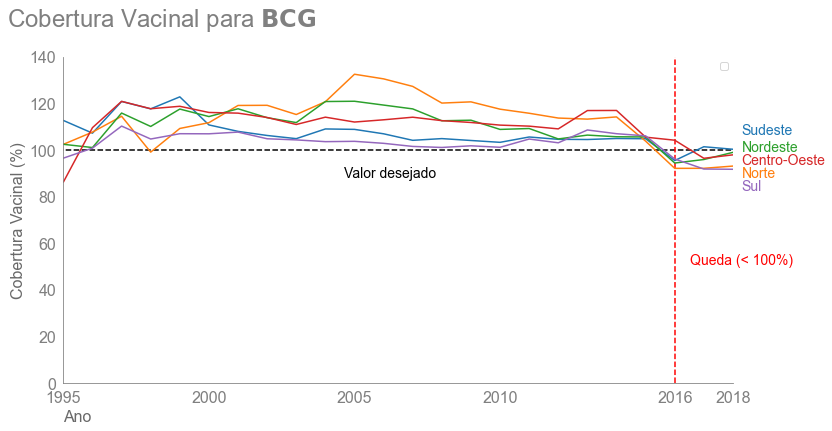

In [13]:
sns.set_style("white")

pal = sns.color_palette("tab10", 5)

fig, ax = plt.subplots(figsize=(12,6))

fig.text(x = 0.06, y = 0.95, s = r'Cobertura Vacinal para $\bf{BCG}$', fontsize=24, color = 'gray') 

ax = sns.lineplot(ax = ax, 
             data = bcg.query('local != "RJ"'), 
             x = 'ano', 
             y = 'cobertura_vacinal', 
             palette = pal,
             hue = 'local')

# limite
ax.set_ylim(0, 140)
ax.set_xlim(1995, 2018)

# Axis
ax.set_xlabel("Ano", loc = 'left', fontsize= 16, color='dimgray')
ax.set_ylabel("Cobertura Vacinal (%)", fontsize= 16, color='dimgray')

# Label
#ax.set_xticks(ticks=[1995, 2000, 2005, 2010, 2015, 2016, 2018])
#ax.set_xticklabels(labels = , color = 'gray', fontsize = 14)
ax.xaxis.set_major_locator(ticker.FixedLocator([1995, 2000, 2005, 2010, 2016, 2018]))
plt.xticks(fontsize= 16, color='gray')
plt.yticks(fontsize= 16, color='gray')
#ax.set_yticks(color = 'gray', fontsize = 14)

# 
ax.hlines(y = 100, xmin = 0, xmax = 3000, ls = '--', color = 'black')
ax.vlines(x = 2016, ymin = 0, ymax = 3000, ls = '--', color = 'red')

#
sns.despine()
ax.spines['bottom'].set_color('gray')
ax.spines['left'].set_color('gray')

#
size = 14
fig.text(x = 0.91, y = 0.7, s = 'Sudeste'      , color = pal[0], fontsize = size) 
fig.text(x = 0.91, y = 0.60, s = 'Norte'       , color = pal[1], fontsize = size) 
fig.text(x = 0.91, y = 0.66, s = 'Nordeste'    , color = pal[2], fontsize = size) 
fig.text(x = 0.91, y = 0.63, s = 'Centro-Oeste', color = pal[3], fontsize = size) 
fig.text(x = 0.91, y = 0.57, s = 'Sul'         , color = pal[4], fontsize = size) 

#
size = 14
fig.text(x = 0.45, y = 0.6, s = 'Valor desejado', color = 'black', fontsize = size) 
fig.text(x = 0.85, y = 0.4, s = 'Queda (< 100%)'  , color = 'red'  , fontsize = size) 
#
plt.legend('')

#
if salvar_figuras:
    plt.savefig('../../Fig/Geradas/BCG_linha.png', format='png', dpi=200)
    
#
plt.show()

> A figura acima mostra a **Cobertura Vacinal** por região no periodo de **1995 a 2018**. A primeira coisa que chama atenção é que muitos valores estão **acima de 100%** (curva tracejada preta horizontal) o que indica que os valores de **Cobertura Vacinal** devem estar superestimados. Isto provavelemente é uma limitação da metodologia utilizada. Uma fonte da incuracia pode ser as estimativa da população alvo utitilizada para o cálculo **Cobertura Vacinal**. Porém o ponto mais importante é a **queda** da **Cobertura Vacional** a partir de **2016** (curva tracejada vermelha vertical). A queda aconteceu em todas as regiões, isso indica que é uma problema do sistema de saúde de uma forma geral. 

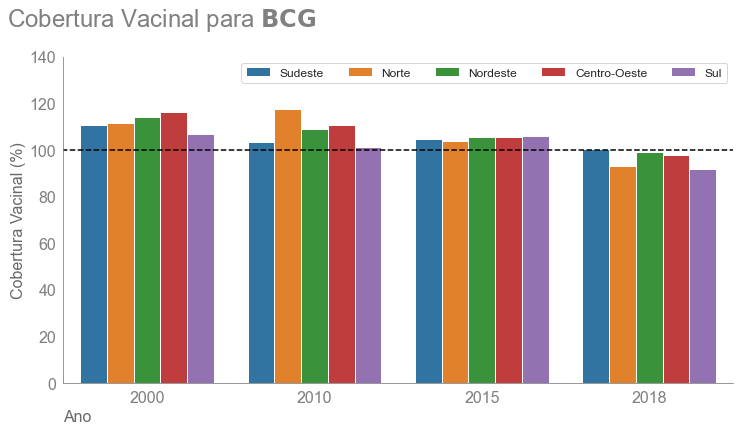

In [14]:
sns.set_style("white")

pal = sns.color_palette("tab10", 5)

fig, ax = plt.subplots(figsize=(12,6))

fig.text(x = 0.06, y = 0.95, s = r'Cobertura Vacinal para $\bf{BCG}$', fontsize=24, color = 'gray') 

ax = sns.barplot(ax = ax, 
             data = bcg.query('local != "RJ" & ano in [2000,2010, 2015,2018]'), 
             x = 'ano', 
             y = 'cobertura_vacinal', 
             hue ='local',
             orient='v', 
             palette = pal)

# limite
ax.set_ylim(0, 140)
ax.set_xlim(-0.5, 3.5)

# Axis
ax.set_xlabel("Ano", loc = 'left', fontsize= 16, color='dimgray')
ax.set_ylabel("Cobertura Vacinal (%)", fontsize= 16, color='dimgray')

# Label
#ax.set_xticks(ticks=[1995, 2000, 2005, 2010, 2015, 2016, 2018])
#ax.set_xticklabels(labels = , color = 'gray', fontsize = 14)
#ax.xaxis.set_major_locator(ticker.FixedLocator([1995, 2000, 2005, 2010, 2016, 2018]))
plt.xticks(fontsize= 16, color='gray')
plt.yticks(fontsize= 16, color='gray')
#ax.set_yticks(color = 'gray', fontsize = 14)

# 
ax.hlines(y = 100, xmin = -0.7, xmax = 3.5, ls = '--', color = 'black')
#ax.vlines(x = 2016, ymin = 0, ymax = 3000, ls = '--', color = 'red')

#
sns.despine()
ax.spines['bottom'].set_color('gray')
ax.spines['left'].set_color('gray')

#
plt.legend(ncol=5, fontsize=12)

#
if salvar_figuras:
    plt.savefig('../../Fig/Geradas/BCG_bar.png', format='png', dpi=200)

#
plt.show()

> O gráfico mostra a **Cobertura Vacional** por **região** nos anos de **2000**, **2010**, **2015** e **2018**. Aqui vemos melhor ainda como os resultados de **2018** estão bem abaixo dos anos anteriores.

---
# 5) Conclusões
---

A distribuição entre os estado da cobertura vacinal de **BCG** é bem uniforme não parecendo haver diferença sistemática entre os estados. 

A partir de **2016** o porcentatual de vacinação aparenta **cair** em todas as regiões. Isso pode indicar que um fenômeno generalizado do sistema de saúde brasileiro. O que corrobora a informações apresentado na imprenssa sobre a queda da **Cobertura Vacinal** nos últimos anos.

Nesse estudo só foi analisada a cobertura da vacina **BCG** em estudos futuros pode-se verificar os outros imunizantes.

---
# 6) Referências
---

[1]        http://blog.saude.mg.gov.br/2019/07/02/bcg-tire-suas-duvidas-sobre-essa-vacina/

[2] DATA_SUS - Tabnet http://tabnet.datasus.gov.br/cgi/tabcgi.exe?pni/cnv/cpniuf.def

[3] http://tabnet.datasus.gov.br/cgi/pni/Imun_cobertura_desde_1994.pdf

---
[Voltar Pagina Inicial do GitHub](https://github.com/HenriqueCCdA/BC_DS_Projeto2)